In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
from cec.constraints_image_explainer import Model
from cec.constraints_image_explainer import Projector
from cec.constraints_image_explainer import DisplayHelper

from IPython.display import display
from IPython.core.display import HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

# Initialize Inception-v3 Model

In [3]:
model = Model()

# Load Image

In [4]:
image_file = 'data/sea_lion.jpg'
image = model.decode_image(image_file)

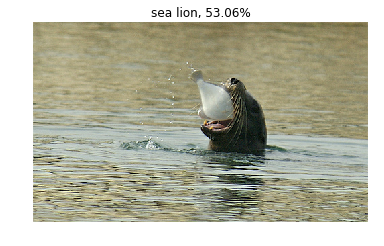

In [5]:
display_helper = DisplayHelper(model, image_file)
display_helper.plot_image(image)
plt.show()

# Define Change Finder

In [6]:
def find_changes(model, image, project_func, iterations=10, verbose=False, beta=0.99):
    predicted_label = model.predict(image).argsort()[-1]
    
    changed_image = image.copy()

    for i in range(iterations):
        perturb = model.get_perturbation(changed_image, predicted_label)
        changed_image += project_func(perturb)


        predictions = model.predict(changed_image)
        predicted_label = predictions.argsort()[-1]
        score = predictions[predicted_label]
        if verbose:
            print(i + 1, model.node_lookup.id_to_string(predicted_label), str(round(100 * score, 2)) + '%')
        if score > beta:
            break

    return changed_image

In [7]:
projector = Projector(image)

# No Constraints

In [8]:
no_constraints_image = find_changes(model, image, projector.no_constraints, verbose=True)

1 sea lion 95.01%
2 sea lion 99.91%


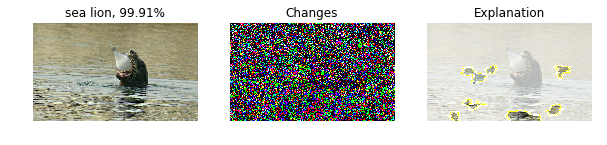

In [9]:
plt.figure(figsize=(10,5))
plt.subplot(1, 3, 1)
display_helper.plot_image(no_constraints_image)
plt.subplot(1, 3, 2)
display_helper.plot_diff(no_constraints_image)
plt.subplot(1, 3, 3)
display_helper.plot_explaination_highlight(no_constraints_image)

# Limited Pixels Constraint

In [10]:
percentage = 0.001
limited_pixels_image = find_changes(model, image, lambda x: projector.limited_pixels(x, percentage), verbose=True)

1 sea lion 75.49%
2 sea lion 86.25%
3 sea lion 91.41%
4 sea lion 94.63%
5 sea lion 96.47%
6 sea lion 97.57%
7 sea lion 98.29%
8 sea lion 98.81%
9 sea lion 99.14%


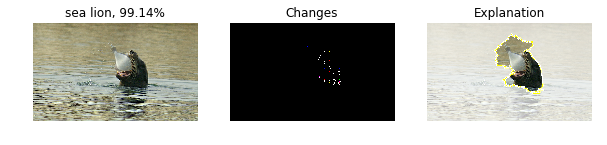

In [11]:
plt.figure(figsize=(10,5))
plt.subplot(1, 3, 1)
display_helper.plot_image(limited_pixels_image)
plt.subplot(1, 3, 2)
display_helper.plot_diff(limited_pixels_image)
plt.subplot(1, 3, 3)
display_helper.plot_explaination_highlight(limited_pixels_image)

# Limited Super-Pixels Constraint

In [12]:
superpixels_cnt = 3
limited_superpixels_image = find_changes(model, image, lambda x: projector.limited_superpixels(x, superpixels_cnt), verbose=True)

1 sea lion 90.4%
2 sea lion 96.01%
3 sea lion 98.99%
4 sea lion 99.78%


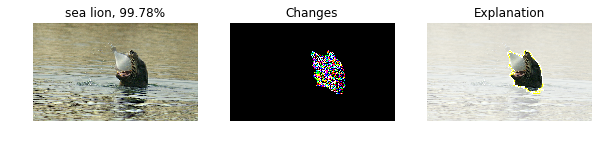

In [13]:
plt.figure(figsize=(10,5))
plt.subplot(1, 3, 1)
display_helper.plot_image(limited_superpixels_image)
plt.subplot(1, 3, 2)
display_helper.plot_diff(limited_superpixels_image)
plt.subplot(1, 3, 3)
display_helper.plot_explaination_highlight(limited_superpixels_image)

# Additional Images

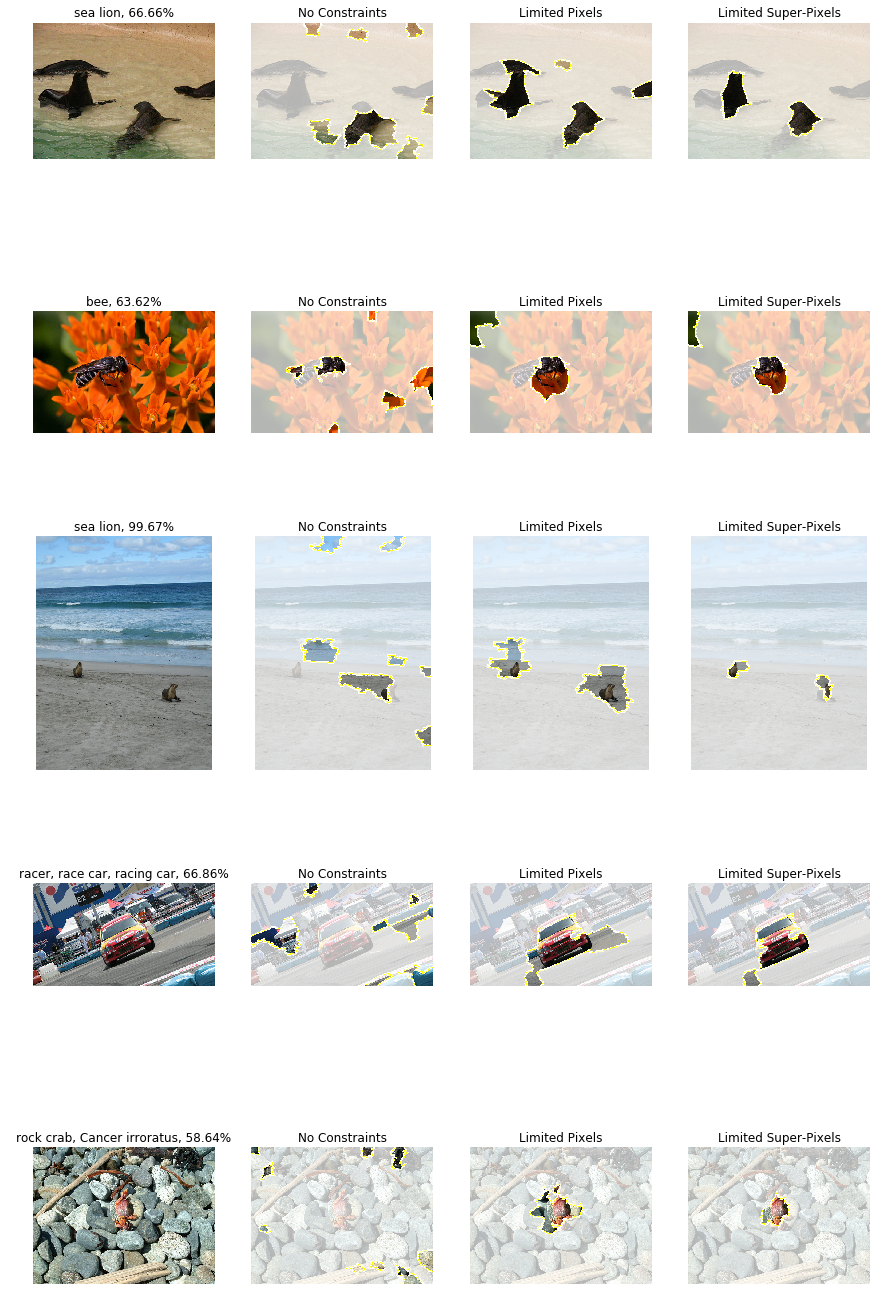

In [14]:
from pathlib import Path

pathlist = list(Path('data/extra').glob('*.jpg'))
image_cnt = len(pathlist)

limited_pixels_percentage = 0.01
limited_superpixels_cnt = 3

plt.figure(figsize=(15, 5 * image_cnt))

for i in range(image_cnt):
    image_file = str(pathlist[i])
    image = model.decode_image(image_file)
    display_helper = DisplayHelper(model, image_file)
    projector = Projector(image)
    
    no_constraints_image = find_changes(model, image, projector.no_constraints, iterations=5)
    limited_pixels_image = find_changes(model, image, lambda x: projector.limited_pixels(x, limited_pixels_percentage), iterations=5)
    limited_superpixel_image = find_changes(model, image, lambda x: projector.limited_superpixels(x, limited_superpixels_cnt), iterations=5)
    
    plt.subplot(image_cnt, 4, (i * 4) + 1)
    display_helper.plot_image(image)
    plt.subplot(image_cnt, 4, (i * 4) + 2)
    display_helper.plot_explaination_highlight(no_constraints_image)
    plt.title('No Constraints')
    plt.subplot(image_cnt, 4, (i * 4) + 3)
    display_helper.plot_explaination_highlight(limited_pixels_image)
    plt.title('Limited Pixels')
    plt.subplot(image_cnt, 4, (i * 4) + 4)
    display_helper.plot_explaination_highlight(limited_superpixel_image)
    plt.title('Limited Super-Pixels')
    
plt.show()